### Start-up

In [1]:
%run cubes_e2e_refresh.py

In [2]:
#%matplotlib notebook

In [3]:
#%load_ext memory_profiler

In [4]:
test_wave = 386.5

### Input spectra

Photons collected.
Input spectra created.
Target magnitude: U_Vega: 18.500; V_Vega: 19.326.
Sky spectrum and atmospheric extinction imported from static model (airmass = 1.16, pwv = 30.0, moond = 0.0).
Background magnitude (per arcsec^2): U_Vega: 21.996; V_Vega: 22.397.


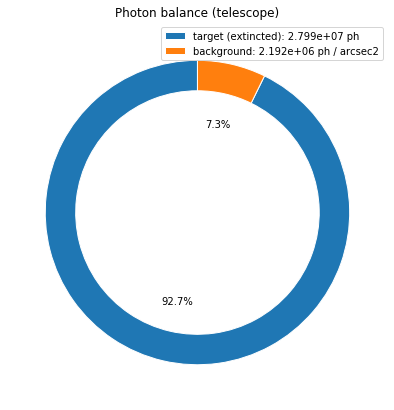

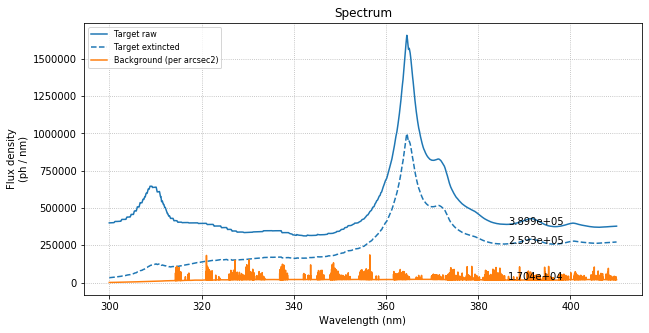

In [5]:
sim.spec_templ = 'custom'  # Template ('flat', 'PL', 'custom')
sim.spec_file = 'Science_Spectra/QSO_composite.dat'  # Path to file

sim.wmin = 300 * au.nm  # Minimum wavelength
sim.wmax = 410 * au.nm  # Maximum wavelength

sim.mag_syst = 'Vega'  # System ('AB', 'Vega')
sim.mag_band = 'U'  # Band ('U', 'B', 'V')
sim.targ_mag = 18.5  # Magnitude

sim.zem = 2.0  # Emission redshift
sim.igm_abs = 'simple'  # IGM absorption

sim.airmass = None  # Airmass
sim.pwv = None  # Precipitable water vapor
sim.moond = None  # Days from new moon
    
sim.texp = 3600*au.s  # Exposure time
sim.spec_in(test_wave)
#%mprun -f sim.spec_in sim.spec_in()  # Only for memory checks

### PSF and slices

Slices designed on field.     


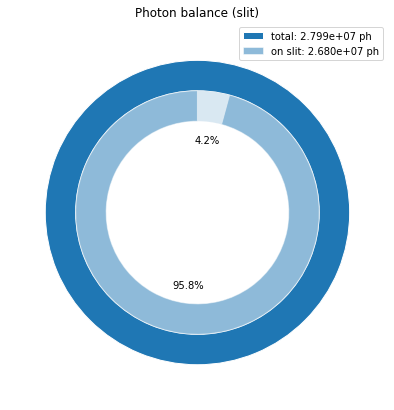

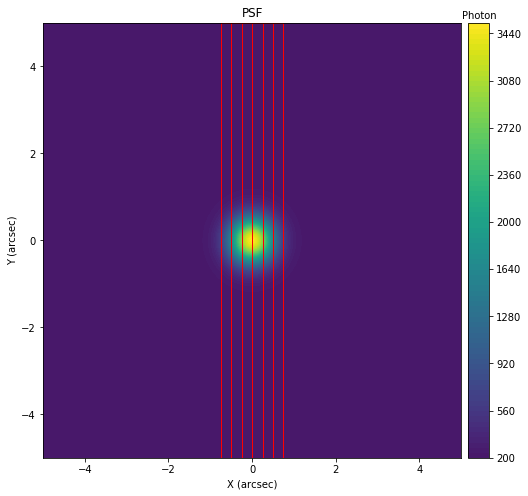

In [6]:
sim.psf_func = 'gaussian'  # Function to represent the PSF ('tophat', 'gaussian')
sim.seeing = 0.87*au.arcsec  # Seeing

sim.targ_prof = None
sim.targ_invrad_params = {'r_eff': 2}
sim.targ_sersic_params = {'amplitude': 1, 'r_eff': 2, 'n': 4, 'x_0': 0.5, 'y_0': 0.5, 'ellip': 0.5, 'theta': 1} 

sim.slice_n = 6  # Number of slices
sim.slice_length = 10*au.arcsec  # Length of the slice
sim.slice_width = 0.25*au.arcsec  # Width of the slice
sim.psf()
#%mprun -f sim.psf sim.psf()  # Only for memory checks

### Spectral format

Slices projected onto arms.       


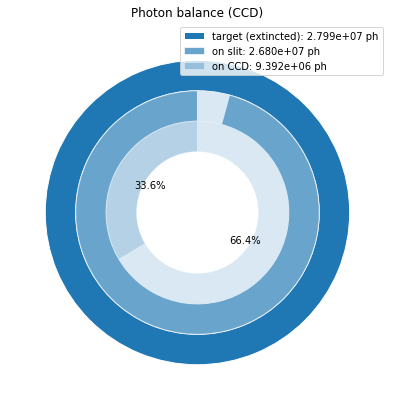

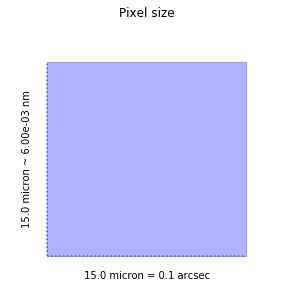

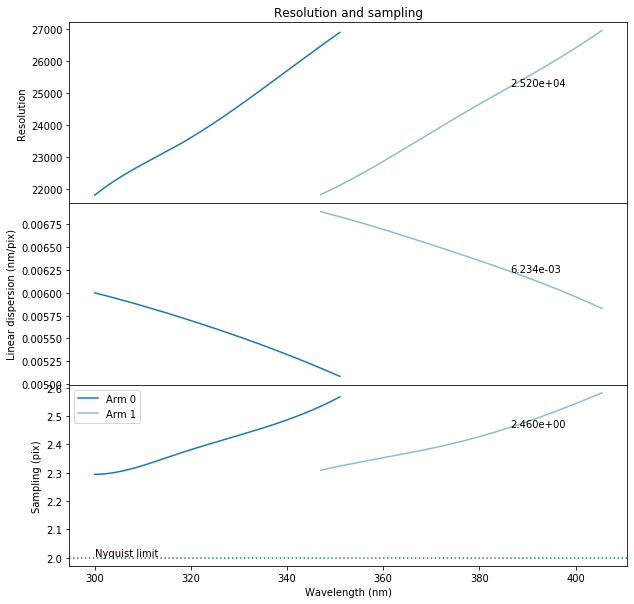

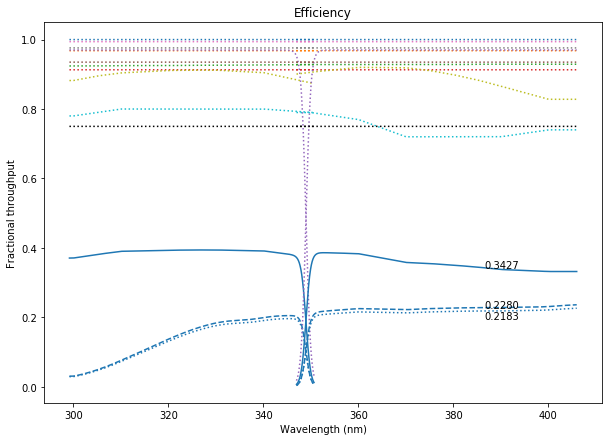

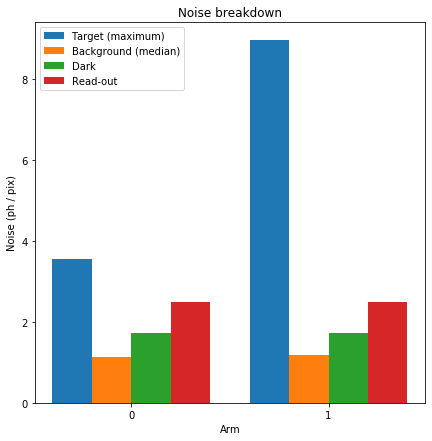

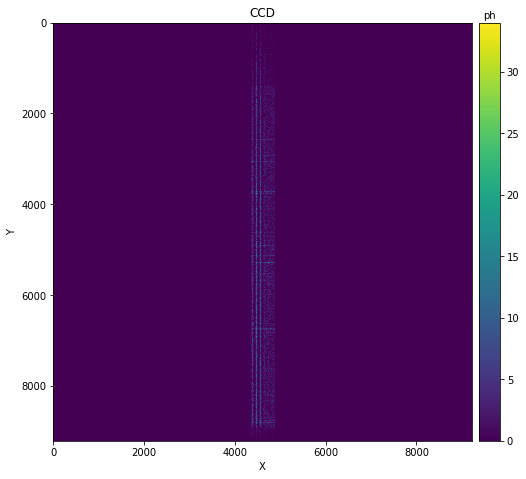

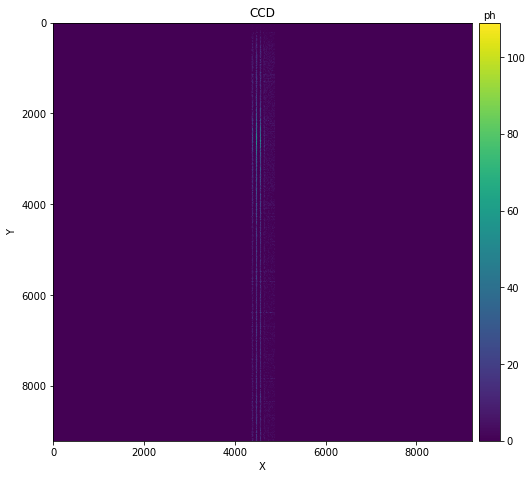

In [7]:
sim.ccd_gain = 1.1*au.photon/au.adu  # Gain (i.e. conversion from ADU to photons)
sim.ccd_ron = 2.5*au.photon / sim.ccd_gain  # Read-out noise (in ADU)
sim.ccd_dark = 3*au.photon/au.h / sim.ccd_gain  # Dark current (in ADU per unit time)
sim.ccd_xsize = 9*1024*au.pixel  # X size of the CCD 
sim.ccd_ysize = 9*1024*au.pixel  # Y size of the CCD
sim.pix_xsize = 15*au.micron  # X size of the pixels
sim.pix_ysize = 15*au.micron  # Y size of the pixels
sim.ccd_xbin = 1  # X binning of the CCD
sim.ccd_ybin = 1  # Y binning of the CCD

sim.spat_scale = 0.25*au.arcsec/(30*au.micron)  # Spatial scale

sim.slice_gap = 10*au.pixel  # Gap between the slices
sim.ccd(test_wave)
#%mprun -f sim.ccd sim.ccd()  # Only for memory checks

### Output spectrum

SNR across arm 0:               
 300.00 nm:   3
 313.00 nm:   6
 317.33 nm:   9
 334.67 nm:  11
 352.01 nm:   0
SNR across arm 1:               
 346.29 nm:   0
 360.97 nm:  25
 375.65 nm:  20
 390.33 nm:  17
 405.00 nm:  19

Summary:

 - Atmosphere efficiency:             0.665
 - Slit efficiency:                   0.958
 - Instrument efficiency:             0.457
 - Telescope efficiency:              0.750
 - Total efficiency (for target):     0.218
 - Total efficiency (for background): 0.343

 - Exposure time:    3.600e+03 s
 - Telescope area:   5.17540e+05 cm2
 - Test wavelength:  3.865e+02 nm
 - Sampling (d-lam): 6.234e-03 nm / pix

 - Target flux:
    - density, raw       (OBJ F0):    2.093e-05 ph / (Angstrom cm2 s)
    - density, extincted (OBJ F1):    1.392e-05 ph / (Angstrom cm2 s)
    - density, on CCD    (OBJ F2):    4.568e-06 ph / (Angstrom cm2 s)
    - collected, on CCD  (OBJ F3):    8.511e+03 ph / Angstrom
    - integrated, on CCD (OBJ F4):    5.306e+02 ph / pix
    - ex

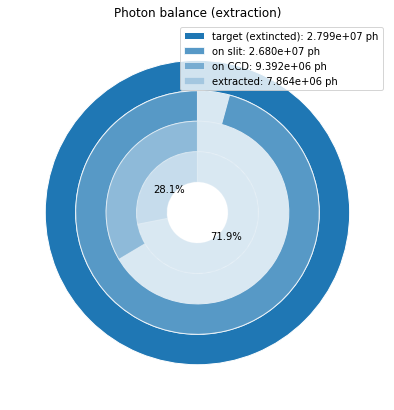

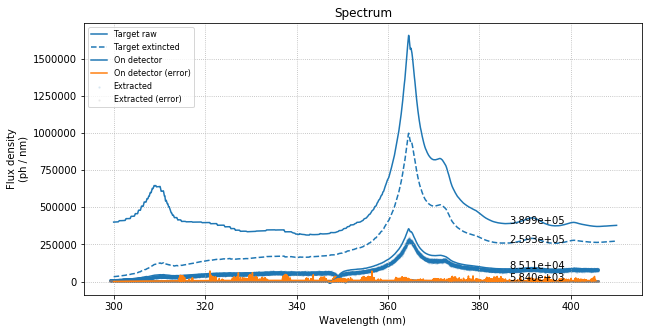

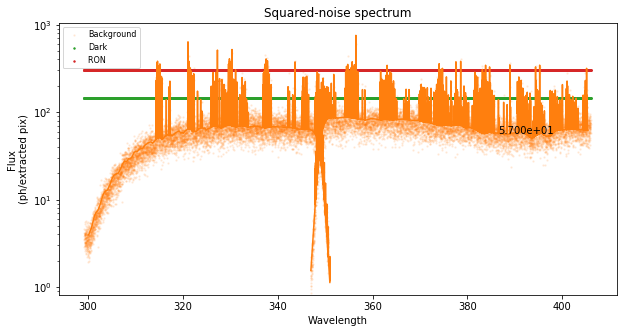

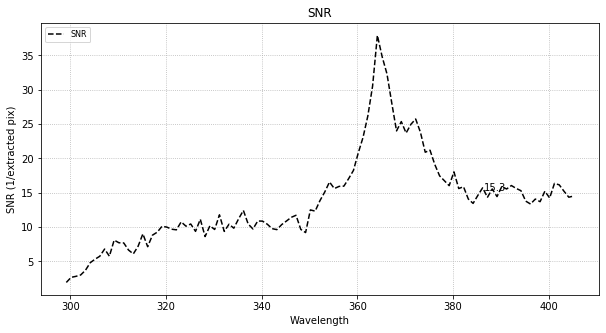

In [8]:
sim.extr_func = 'sum'  # Function for extracting the spectrum ('sum', 'opt' [very slow and not well tested])
sim.extr_fwhm_num = 1.2   # Number of FWHMs used in 'sum' extraction

sim.snr_sampl = 1*au.nm  # Data points per SNR point

sim.spec_draw(test_wave)
#%mprun -f sim.spec_draw sim.spec_draw()  # Only for memory checks